* Author : Dev Soni
* Project Name : Wine Quality Prediction Model using Random Forest


The Wine Quality Prediction project aims to predict the quality of wine based on various chemical properties using machine learning techniques. By leveraging a Random Forest classifier, this project demonstrates the process of building a predictive model, from data collection and preprocessing to model evaluation and deployment.

**Tools and Libraries**<br>
Python: Programming language used for the project.<br>
Google Colab: Development environment for writing and running Python code.<br>
Pandas: Data manipulation and analysis.<br>
Numpy: Numerical operations.<br>
Matplotlib & Seaborn: Data visualization.<br>
Scikit-learn: Machine learning library for model building and evaluation.<br>

**Dataset**<br>
The dataset consists of various chemical properties of wines, along with their quality ratings. Key features include:

Fixed acidity,
Volatile acidity,
Citric acid,
Residual sugar,
Chlorides,
Free sulfur dioxide,
Total sulfur dioxide,
Density,
pH,
Sulphates,
Alcohol,
Quality (target variable)

1. Setup Environment
2. Loading and Exploring Data
3. Visualizing Data
4. Preprocessing Data
5. Splitting Data
6. Model Training
7. Model Evaluation
8. Building a Predictive System
9. Deploy




*   Wine Data -> Data Analysis -> Data pre processing ->  Train Test Split -> Random Forest Model -> Trained Random Forest Model -> Prediction




## Setup the Enviromnent

In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## Loading and Exploring Data


In [ ]:
#loading the dataset to Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')



In [ ]:
# number of rows and columns in the dataset
wine_dataset.shape

(1599, 12)

In [ ]:
#viewing first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for any missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# currently no missing values in the dataset. if there were any missing values - either drop the particular row or find the mean value of the column

## Visualizing and Analyzing the Data

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


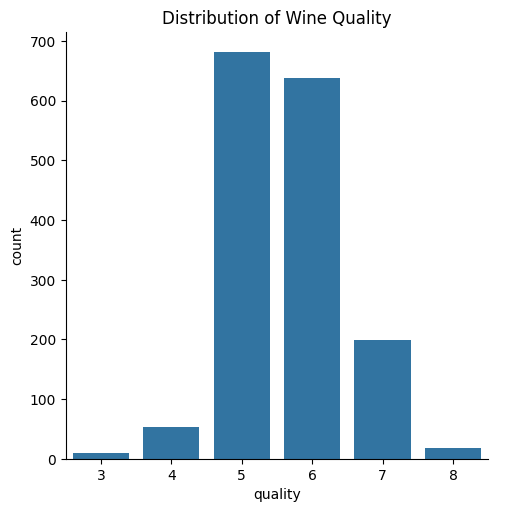

In [ ]:
# number of values for each quality of wine
sns.catplot(x='quality', data = wine_dataset, kind = 'count')
plt.title('Distribution of Wine Quality')
plt.show()

### One to note here is that the number of the values for 5 & 6 quality are high.

<Axes: xlabel='quality', ylabel='volatile acidity'>

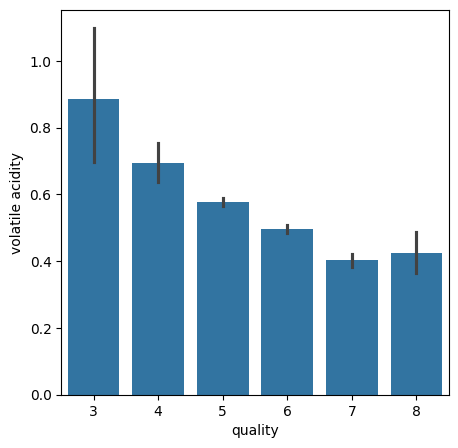

In [ ]:
# comparing columns with quality

# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)


### The volatile acidity and the quality are inversely proportional.

<Axes: xlabel='quality', ylabel='citric acid'>

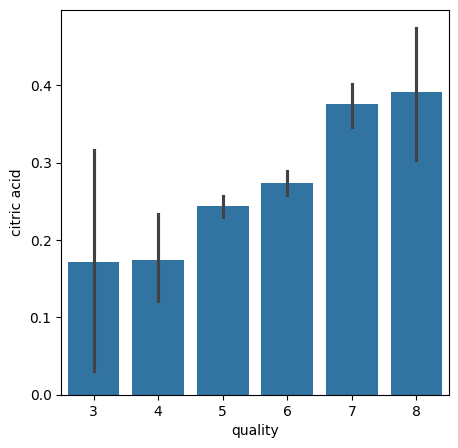

In [ ]:
# citric acid vd quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset)

### if citric acid is low, quality is low, and vice versa. Therefore citric acid content is directly proportional to wine quality.

## Correlation


1.   Positive Correlation
2.   Negative Correlation



In [ ]:
correlation  = wine_dataset.corr()

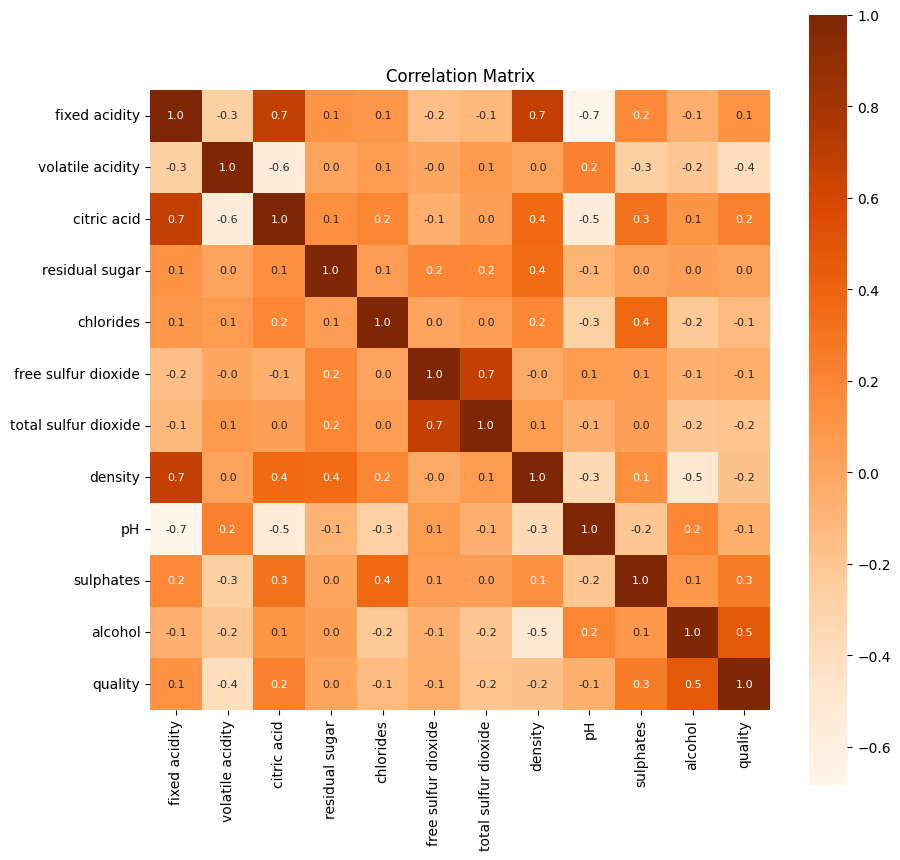

In [ ]:
# constructing a heatmap to understand the correlation between all the columns of the dataset
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Oranges')
plt.title('Correlation Matrix')
plt.show()

### alcohol is positively correlated
### volatile acidity is negatively correlated


## Preprocessing Data

In [ ]:
#separating the data and labelling it
X = wine_dataset.drop('quality', axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Label Binarization
### labelling the quality as good or bad.
(1) good >= 7 <br>
(0) bad <= 6

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Splitting Train and Test Data

* test data is 20% of the full data



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 88)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


## Training the model : Random Forest Classifier

In [ ]:
model = RandomForestClassifier()


In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

## Evaulating our Model using Accuracy Score values

In [ ]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.921875


In [ ]:
# accuracy is really good nearly 92%. this model can correctly predict 92/100 values.

## Building a Predictive System

In [ ]:
# selecting a random row of values from our dataset
input_data = [7.3,	0.65,	0.0	,1.2	,0.065	,15.0	,21.0	,0.9946,	3.39,	0.47,	10.0]

#simply defining the feature names
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# changing the input data to a numpy array
input_data_numpy = np.asarray(input_data)



#reshaping the data as we are predicting the label only for one instance
# input_data_reshaped = input_data_numpy.reshape(1,-1)

# Create a DataFrame for the input data
input_data_df = pd.DataFrame([input_data_numpy], columns=feature_names)

prediction = model.predict(input_data_df)
print(prediction)


print('Good Quality Wine' if prediction[0] == 1 else 'Bad Quality Wine')

[1]
Good Quality Wine
